# Forschungsdaten des Language Archive Cologne (LAC)

<a id="0"></a>
## Inhalt

1. [Statistische Beschreibung des Datensatzes](#1)

2. [Univariate Plots](#2)

   2.1. [Forschungsdaten im Zeitverlauf](#2.1)
   
   2.2. [Verteilung der Urheberschaft](#2.2)

   2.3. [Sprachverteilung](#2.3)

   2.4. [Entstehungszeit der Forschungsdaten](#2.4)

   2.5. [Verteilung der Publisher](#2.5)

   2.6. [Verteilung der Lizenzangaben](#2.6)

3. [Word Clouds](#3)

4. [Bi- und multivariate Plots](#4)


<a id="1"></a>
## Statistische Beschreibung des Datensatzes

[Zurück zum Anfang](#0)

In [1]:
# Importieren der Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Laden der Daten
data_lac = pd.read_csv(r'../../data/refined/clarin/lac/lac-records-20240620_refined.csv')
# Umwandeln der Datentypen der Zeitangaben in datetime-Objekte
data_lac[['date', 'datestamp']] = data_lac[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')

In [2]:
data_lac.info() # Spaltennamen, Datentypen und fehlende Werte anzeigen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   100 non-null    datetime64[ns, UTC]
 1   relation                    644 non-null    object             
 2   creator                     125 non-null    object             
 3   language                    104 non-null    object             
 4   identifier                  100 non-null    object             
 5   title                       100 non-null    object             
 6   description                 100 non-null    object             
 7   date                        97 non-null     datetime64[ns, UTC]
 8   publisher                   100 non-null    object             
 9   rights                      51 non-null     object             
 10  type                        11 non-null     object            

In [4]:
data_lac.head() # Erste 5 Zeilen des Dataframes anzeigen

,datestamp,relation,creator,language,identifier,title,description,date,publisher,rights,type,type - dcmi recommendation
0,2020-02-05 15:15:01+00:00,hdl:11341/0000-0000-0000-3666,Alexander von Plato,deu,hdl:11341/0000-0000-0000-35D9,OH-Interview with Albert C.,Oral history Interview conducted 1981 by Alexa...,1981-09-23 00:00:00+00:00,LAC,NaN,NaN,NaN
1,NaT,hdl:11341/0000-0000-0000-3667,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,NaT,hdl:11341/0000-0000-0000-3668,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,NaT,hdl:11341/0000-0000-0000-3669,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,NaT,hdl:11341/0000-0000-0000-366A,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [5]:
data_lac.describe() # statistische Kennzahlen anzeigen

,datestamp,relation,creator,language,identifier,title,description,date,publisher,rights,type,type - dcmi recommendation
count,100,644,125,104,100,100,100,97,100,51,11,11
unique,NaN,644,38,17,100,100,84,NaN,2,5,1,1
top,NaN,hdl:11341/0000-0000-0000-3666,Issak Cheikh Oukafi,taq,hdl:11341/0000-0000-0000-35D9,OH-Interview with Albert C.,Recording by Asangba Reginald Taluah for Ph.D ...,NaN,LAC,CC BY,collection,collection
freq,NaN,1,22,22,1,1,6,NaN,99,20,11,11
mean,2020-02-05 15:15:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2005-04-04 05:11:45.154639232+00:00,NaN,NaN,NaN,NaN
min,2020-02-05 15:15:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1980-10-12 00:00:00+00:00,NaN,NaN,NaN,NaN
25%,2020-02-05 15:15:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1991-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN
50%,2020-02-05 15:15:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-12 00:00:00+00:00,NaN,NaN,NaN,NaN
75%,2020-02-05 15:15:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01 00:00:00+00:00,NaN,NaN,NaN,NaN
max,2020-02-05 15:15:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN


In [3]:
sns.color_palette('flare', 12)

[(0.92277222, 0.61701365, 0.45971384),
 (0.91416896, 0.54052962, 0.41396347),
 (0.90157824, 0.46275577, 0.37697105),
 (0.88217931, 0.38923439, 0.35995244),
 (0.84696243, 0.31979068, 0.36806976),
 (0.79244362, 0.2695883, 0.39342447),
 (0.72585394, 0.24300672, 0.41669383),
 (0.65162696, 0.22317307, 0.4327001),
 (0.57860222, 0.20328034, 0.44122241),
 (0.50908361, 0.18613639, 0.4408295),
 (0.43469046, 0.17148074, 0.42859124),
 (0.36109117, 0.15646169, 0.40672362)]

In [4]:
flare_palette = sns.color_palette("flare", 12, as_cmap=False)
flare_hex = flare_palette.as_hex()
print(flare_hex)

['#eb9d75', '#e98a6a', '#e67660', '#e1635c', '#d8525e', '#ca4564', '#b93e6a', '#a6396e', '#943471', '#822f70', '#6f2c6d', '#5c2868']



<a id="2"></a>
## Univariate Plots

[Zurück zum Anfang](#0)



***Untersuchte Variablen:***

- creator
- language
- date
- publisher
- rights


<a id="2.1"></a>
### 2.1 Forschungsdaten im Zeitverlauf
[Zurück zum Anfang](#0)

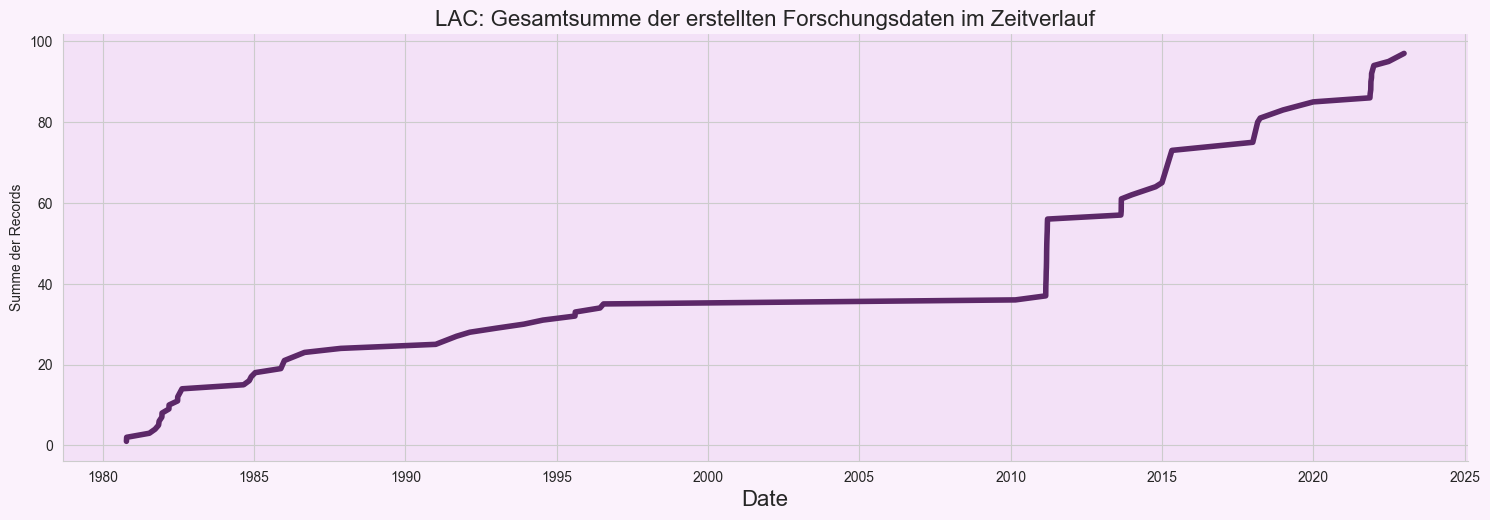

In [7]:
daily_counts = data_lac.groupby(data_lac['date'].dt.date).size().reset_index(name='count')# Gruppieren und Zählen der Records nach Datum
daily_counts['cumulative_count'] = daily_counts['count'].cumsum() # Berechnen der kumulativen Summe


sns.set_style('whitegrid', {'axes.facecolor':'#f3e1f7', 'figure.facecolor': '#fbf2fc' }) # Style des Plots anpassen

# Plot der kumulativen Summe der Records über die Zeit
sns.relplot(daily_counts, x='date', y='cumulative_count', kind='line', 
height=5, aspect=3, errorbar = None, color='#5c2868', linewidth=4)


plt.title('LAC: Gesamtsumme der erstellten Forschungsdaten im Zeitverlauf', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Summe der Records')
# plt.xticks(rotation=45) 
plt.show()



<a id="2.2"></a>
### 2.2 Verteilung der Urheberschaft (creator)

[Zurück zum Anfang](#0)

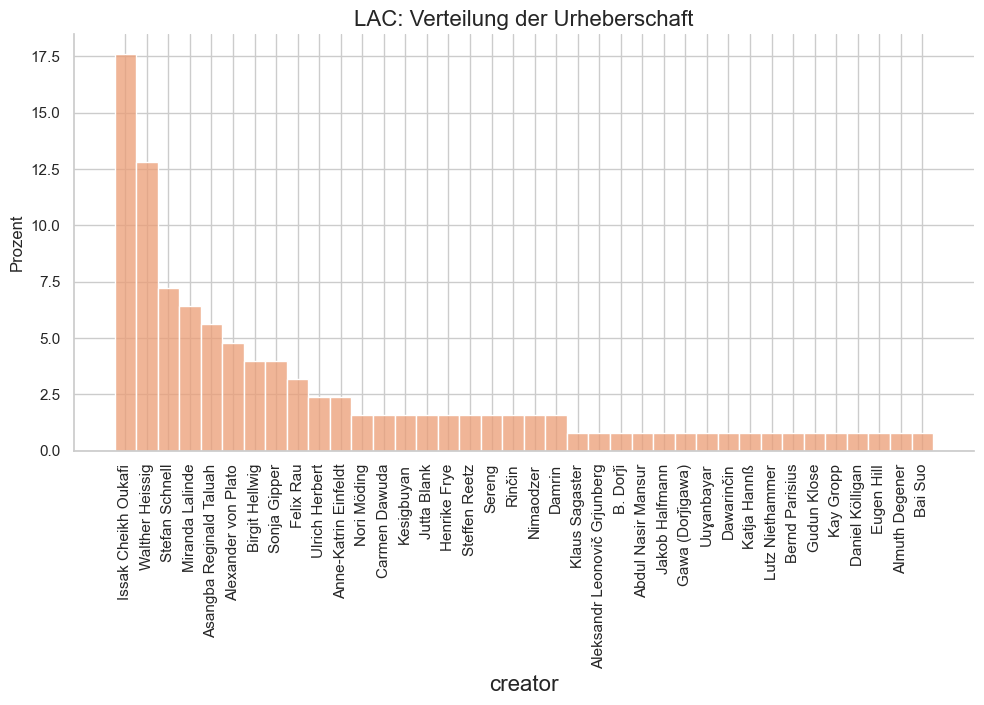

In [9]:
sns.set_theme() #Wiederherstellen der Defaulteinstellungen

order = data_lac['creator'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_lac['creator'] = pd.Categorical(data_lac['creator'], categories=order, ordered=True)

sns.set_style('whitegrid')
sns.displot(data_lac, x = 'creator', color='#eb9d75', aspect = 2, stat='percent')
plt.xticks(rotation=90)
plt.title('LAC: Verteilung der Urheberschaft', fontsize=16)
plt.xlabel('creator', fontsize=16)
plt.ylabel('Prozent')
plt.show()


<a id="2.3"></a>
### 2.3 Sprachverteilung der Forschungsdaten

[Zurück zum Anfang](#0)

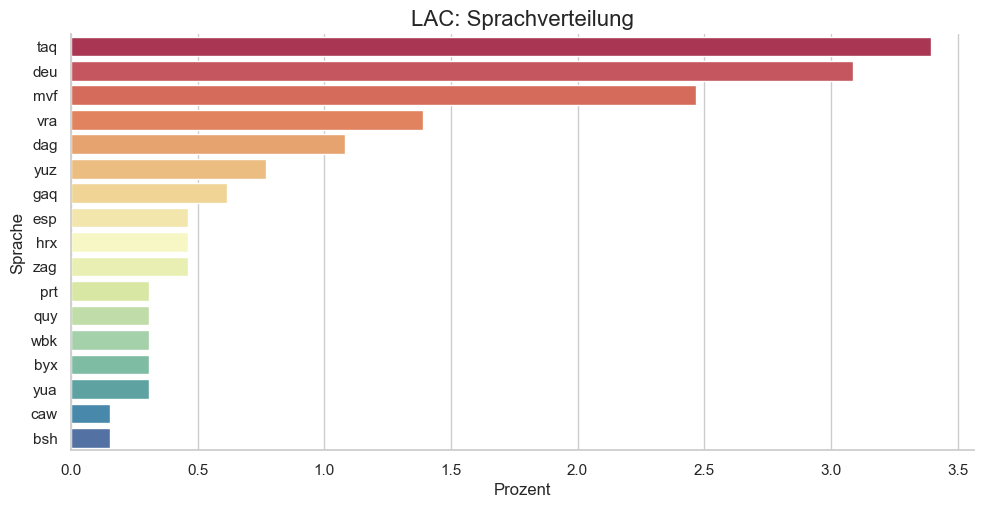

In [22]:
order = data_lac['language'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_lac['language'] = pd.Categorical(data_lac['language'], categories=order, ordered=True)

sns.catplot(data = data_lac, y = 'language', kind = 'count', aspect = 2, stat='percent', hue = 'language', palette = 'Spectral', legend=False)

plt.title('LAC: Sprachverteilung', fontsize=16)
plt.xlabel('Prozent', fontsize=12)
plt.ylabel('Sprache', fontsize=12)
plt.show()

### 2.4 Entstehungszeit der Forschungsdaten

[Zurück zum Anfang](#0)

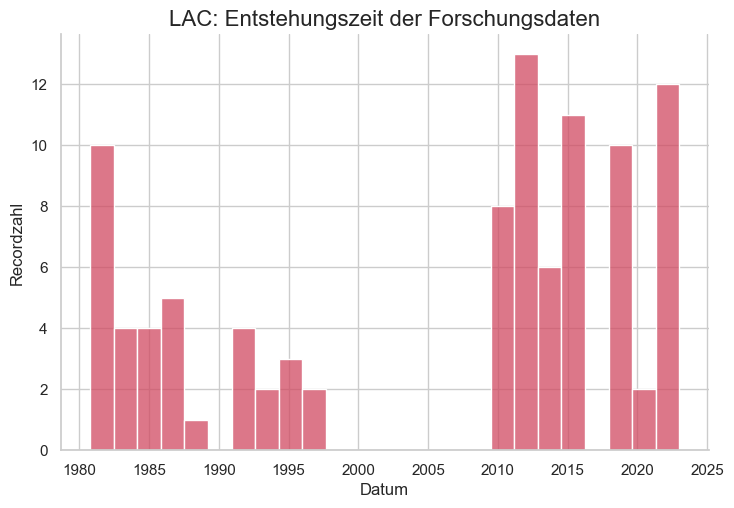

In [25]:
sns.set_theme(style='whitegrid') # seaborn-Design setzen
sns.displot(data_lac, x='date', bins=25, color = '#d14a61', aspect=1.5) # Erscheinungszeitpunkt der Forschungsdaten in absolten Zahlen

plt.title('LAC: Entstehungszeit der Forschungsdaten', fontsize=16)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)
plt.show()


<a id="2.5"></a>
### 2.5 Verteilung der Publisher

[Zurück zum Anfang](#0)

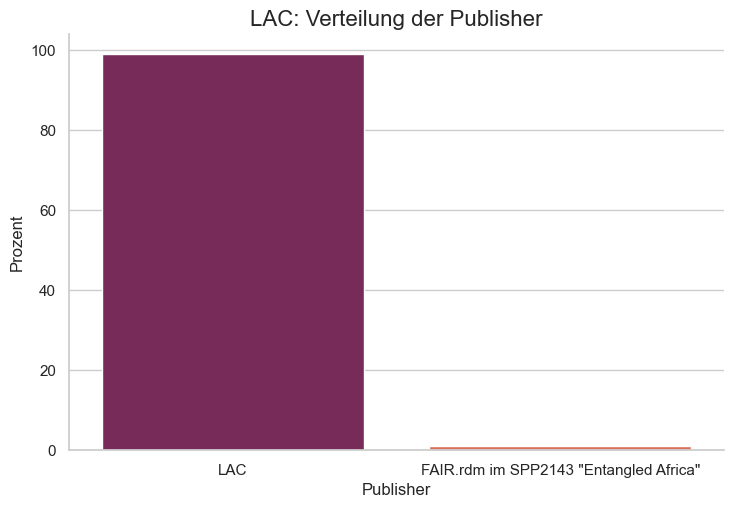

In [26]:
sns.catplot(data_lac, x = 'publisher', kind='count', aspect = 1.5, hue = "publisher", palette='rocket', legend=False)

plt.title('LAC: Verteilung der Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Prozent', fontsize=12)
plt.show()



<a id="2.6"></a>
### 2.6 Verteilung der Lizenzangaben

[Zurück zum Anfang](#0)

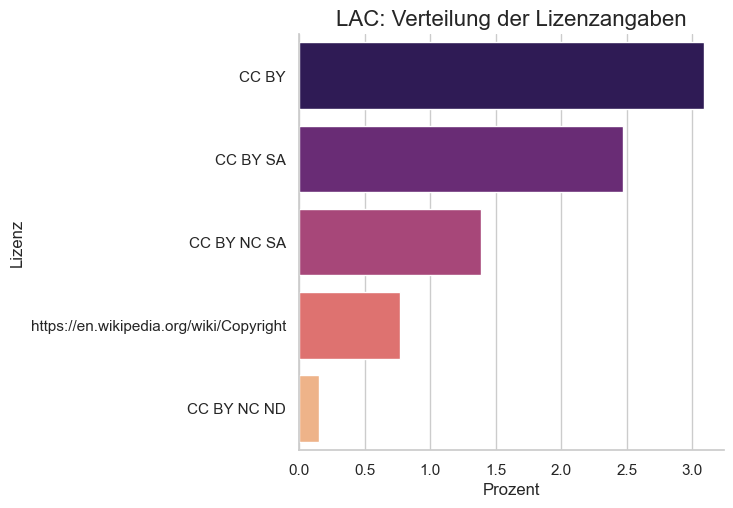

In [28]:
order = data_lac['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_lac['rights'] = pd.Categorical(data_lac['rights'], categories=order, ordered=True)

sns.catplot(data_lac, y = 'rights', kind = 'count', aspect = 1.5, stat='percent', hue = 'rights', palette='magma', legend=False)

plt.title('LAC: Verteilung der Lizenzangaben', fontsize=16)
plt.xlabel('Prozent', fontsize=12)
plt.ylabel('Lizenz', fontsize=12)
plt.show()




<a id="3"></a>
## 3 Word Clouds
[Zurück zum Anfang](#0)

- title
- description



<a id="3.1"></a>
### 3.1 Häufige Titelbegriffe

[Zurück zum Anfang](#0)

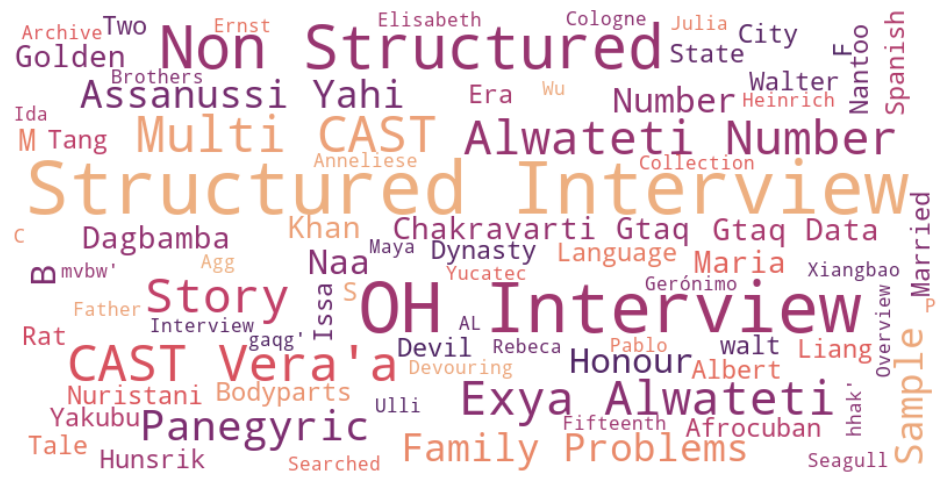

In [29]:

# Textdaten für die Word Cloud aus Dataframe wählen
text_data = data_lac["title"].str.cat(sep=' ')

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='flare', max_words=80).generate(text_data)


#Plotten mit matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()


<a id="3.2"></a>
### 3.2 Beschreibung der Resource

[Zurück zum Anfang](#0)

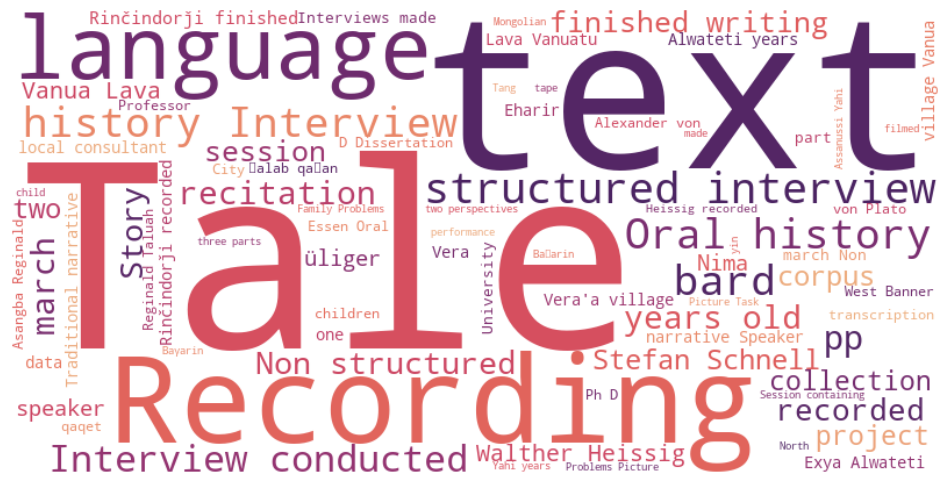

In [16]:

# Textdaten für die Word Cloud aus Dataframe wählen
text_data = data_lac["description"].str.cat(sep=' ')

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=80, colormap='flare').generate(text_data)


'Plotten mit matplotlib'
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()



<a id="4"></a>
## 4 Bi- und multivariate Plots
[Zurück zum Anfang](#0)

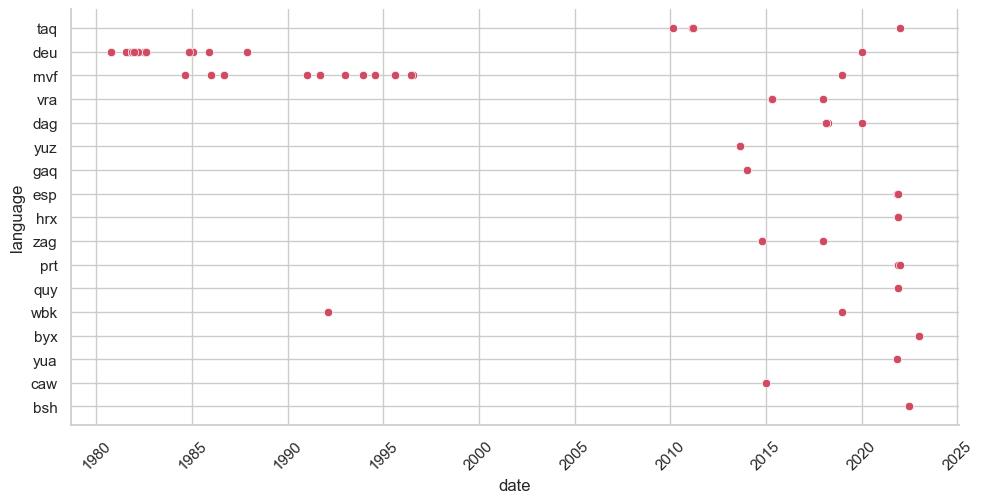

In [17]:
sns.relplot(data_lac, x='date', y='language', kind='scatter', aspect=2, color='#d14a61')
plt.xticks(rotation=45)
plt.show()